In this code, I'll check the relations between selected features (feature engineering) and target.

**Is important to understand that maybe this visualizations may not represent a fully information of the reality, the main reason is the dataset is unbalanced between attrited and existing customers!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir_in = "C:/Users/barre/Desktop/Machine Learning/projects/bank/in/{}"

In [3]:
df = pd.read_csv(dir_in.format('data_selection.csv'))
df.sample(3)

,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Months_Inactive_12_mon,Target
2615,68,2317,5,2,1
3722,87,1290,5,2,1
4438,79,0,5,3,1


Renaming the values on target to have a better comprehension

In [4]:
target_dict = {0 : 'Attrited Customer',
               1 : 'Existing Customer'
              }

df['Target'] = df['Target'].map(target_dict)
df.head()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Months_Inactive_12_mon,Target
0,42,777,5,1,Existing Customer
1,33,864,6,1,Existing Customer
2,20,0,4,1,Existing Customer
3,20,2517,3,4,Existing Customer
4,28,0,5,1,Existing Customer


In [5]:
df.groupby('Target').count()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Months_Inactive_12_mon
Target,,,,
Attrited Customer,1561,1561,1561,1561
Existing Customer,8235,8235,8235,8235


### Attrition & Number of Transactions per customer in latest 12 months

In [6]:
df.groupby('Target')['Total_Trans_Ct'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Attrited Customer,1561.0,45.000000,14.661217,10.0,37.0,43.0,51.0,94.0
Existing Customer,8235.0,68.565756,22.984590,11.0,54.0,71.0,82.0,139.0


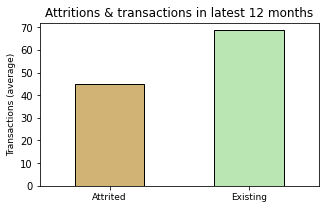

In [7]:
plt.figure(figsize=(5, 3))
df.groupby('Target')['Total_Trans_Ct'].mean().plot(kind='bar', 
                                                   color=['#D1B375', '#BAE6B3'], 
                                                   edgecolor='black');

plt.title("Attritions & transactions in latest 12 months", size=12);
plt.ylabel("Transactions (average)", size=9);
plt.xticks([0, 1], ['Attrited', 'Existing'], rotation=0, size=9);
plt.xlabel("");

### Attrition & Credit Unpaid per customer in latest 12 months

In [8]:
df_relation = df.copy()
df_relation['ones'] = 1

In [9]:
df.groupby('Target')['Total_Revolving_Bal'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Attrited Customer,1561.0,674.921204,923.224043,0.0,0.0,0.0,1309.0,2517.0
Existing Customer,8235.0,1258.041287,756.717382,0.0,801.0,1366.0,1807.0,2517.0


In [10]:
df_relation['Total_Revolving_Bal'] = pd.cut(df_relation['Total_Revolving_Bal'],
                                            bins=[-1, 400, 900, 1200, 1600, 2000, 2600])
df_relation.head()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Months_Inactive_12_mon,Target,ones
0,42,"(400, 900]",5,1,Existing Customer,1
1,33,"(400, 900]",6,1,Existing Customer,1
2,20,"(-1, 400]",4,1,Existing Customer,1
3,20,"(2000, 2600]",3,4,Existing Customer,1
4,28,"(-1, 400]",5,1,Existing Customer,1


In [11]:
df_relation.groupby(['Target', 'Total_Revolving_Bal'])[['ones']].count()

ones
Target            Total_Revolving_Bal      
Attrited Customer (-1, 400]             926
                  (400, 900]            152
                  (900, 1200]            74
                  (1200, 1600]           80
                  (1600, 2000]           84
                  (2000, 2600]          245
Existing Customer (-1, 400]            1519
                  (400, 900]            825
                  (900, 1200]          1054
                  (1200, 1600]         1844
                  (1600, 2000]         1627
                  (2000, 2600]         1366

In %:

In [12]:
revolving_bal = df_relation.groupby(['Target', 'Total_Revolving_Bal'])[['ones']].count().groupby(level=0).apply(
                lambda x:
                x / x.sum()*100
            )

revolving_bal

ones
Target            Total_Revolving_Bal           
Attrited Customer (-1, 400]            59.320948
                  (400, 900]            9.737348
                  (900, 1200]           4.740551
                  (1200, 1600]          5.124920
                  (1600, 2000]          5.381166
                  (2000, 2600]         15.695067
Existing Customer (-1, 400]            18.445659
                  (400, 900]           10.018215
                  (900, 1200]          12.799029
                  (1200, 1600]         22.392228
                  (1600, 2000]         19.757134
                  (2000, 2600]         16.587735

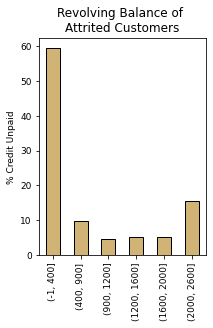

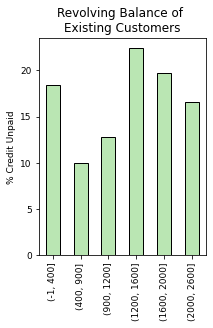

In [13]:
revolving_bal.reset_index('Target').iloc[:6,1:].plot(kind='bar', 
                                                     figsize=(3,4), 
                                                     legend=None,
                                                     color='#D1B375',
                                                     edgecolor='black');

plt.title("Revolving Balance of \nAttrited Customers", size=12);
plt.ylabel("% Credit Unpaid", size=9);
plt.xticks(size=9)
plt.yticks(size=9)
plt.xlabel("");


revolving_bal.reset_index('Target').iloc[6:,1:].plot(kind='bar',
                                                     figsize=(3,4),
                                                     legend=None,
                                                     color='#BAE6B3',
                                                     edgecolor='black');

plt.title("Revolving Balance of \nExisting Customers", size=12);
plt.ylabel("% Credit Unpaid", size=9);
plt.xticks(size=9)
plt.yticks(size=9)
plt.xlabel("");

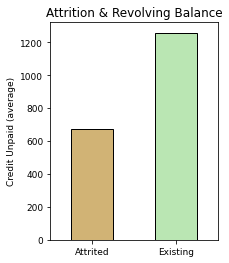

In [14]:
df.groupby('Target')['Total_Revolving_Bal'].mean().plot(kind='bar', 
                                                        color=['#D1B375', '#BAE6B3'], 
                                                        edgecolor='black',
                                                        figsize=(3,4));

plt.title("Attrition & Revolving Balance", size=12);
plt.ylabel("Credit Unpaid (average)", size=9);
plt.yticks(size=9)
plt.xticks(size=9)
plt.xticks([0, 1], ['Attrited', 'Existing'], rotation=0);
plt.xlabel("");

### Attrition & Months Inactive in latest 12 months

In [15]:
df.groupby('Target')['Months_Inactive_12_mon'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Attrited Customer,1561.0,2.631646,0.726423,1.0,2.0,3.0,3.0,4.0
Existing Customer,8235.0,2.181785,0.860776,1.0,1.0,2.0,3.0,4.0


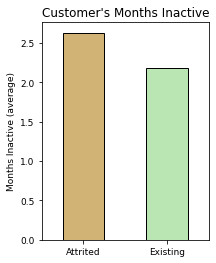

In [16]:
df.groupby('Target')['Months_Inactive_12_mon'].mean().plot(kind='bar', 
                                                           color=['#D1B375', '#BAE6B3'], 
                                                           edgecolor='black',
                                                           figsize=(3,4));

plt.title("Customer's Months Inactive", size=12);
plt.ylabel("Months Inactive (average)", size=9);
plt.yticks(size=9)
plt.xticks(size=9)
plt.xticks([0, 1], ['Attrited', 'Existing'], rotation=0);
plt.xlabel("");

### Number of Products per Client

In [17]:
df.groupby('Target')['Total_Relationship_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Attrited Customer,1561.0,3.294683,1.584064,1.0,2.0,3.0,5.0,6.0
Existing Customer,8235.0,3.910504,1.529765,1.0,3.0,4.0,5.0,6.0


In [18]:
df_relation['Total_Relationship_Count'] = pd.cut(df_relation['Total_Relationship_Count'], 
                                                 bins=[0, 2, 4, 6])

In [27]:
rel_count = df_relation.groupby(['Target', 'Total_Relationship_Count'])[['ones']].count()

rel_count = rel_count.groupby(level=0).apply(lambda x: x / x.sum()*100)

In [29]:
rel_count

ones
Target            Total_Relationship_Count           
Attrited Customer (0, 2]                    35.618193
                  (2, 4]                    38.052530
                  (4, 6]                    26.329276
Existing Customer (0, 2]                    18.627808
                  (2, 4]                    42.210079
                  (4, 6]                    39.162113

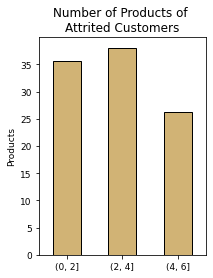

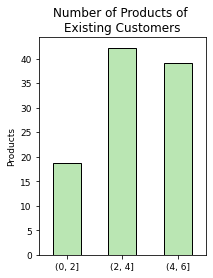

In [38]:
# attrited customers
rel_count.reset_index('Target').iloc[:3, 1:].plot(kind='bar', 
                                                     figsize=(3,4), 
                                                     legend=None,
                                                     color='#D1B375',
                                                     edgecolor='black');

plt.title("Number of Products of \nAttrited Customers", size=12);
plt.ylabel("Products", size=9);
plt.xticks(size=9, rotation=0)
plt.yticks(size=9)
plt.xlabel("");

# existing customers
rel_count.reset_index('Target').iloc[3:, 1:].plot(kind='bar', 
                                                     figsize=(3,4), 
                                                     legend=None,
                                                     color='#BAE6B3',
                                                     edgecolor='black');

plt.title("Number of Products of \nExisting Customers", size=12);
plt.ylabel("Products", size=9);
plt.xticks(size=9, rotation=0)
plt.yticks(size=9)
plt.xlabel("");
